In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
am_peak = pd.read_csv('/content/drive/MyDrive/B A 데이터 모음/00클러스터링/Preprocessed_datasets/OD_AMPEAK.csv')
pm_peak = pd.read_csv('/content/drive/MyDrive/B A 데이터 모음/00클러스터링/Preprocessed_datasets/OD_PMPEAK.csv')

In [4]:
am_peak = am_peak.drop(columns=["Unnamed: 0", "bus_and_subway", "transportation_total"])
pm_peak = pm_peak.drop(columns=["Unnamed: 0", "bus_and_subway", "transportation_total"])

In [5]:
# drop the rows that has same origin and destination
am_peak = am_peak[~((am_peak['gu_origin'] == am_peak['gu_dest']) & (am_peak['dong_origin'] == am_peak['dong_dest']))]
pm_peak = pm_peak[~((pm_peak['gu_origin'] == pm_peak['gu_dest']) & (pm_peak['dong_origin'] == pm_peak['dong_dest']))]

In [6]:
am_peak['total'] = am_peak[['car', 'taxi', 'bus', 'subway']].sum(axis=1)
pm_peak['total'] = pm_peak[['car', 'taxi', 'bus', 'subway']].sum(axis=1)

In [7]:
am_peak

,code_origin,code_dest,gu_origin,dong_origin,gu_dest,dong_dest,car,taxi,bus,subway,total
1,1.111054e+09,1.111060e+09,종로구,삼청동,종로구,가회동,0.135,0.065,4.007,0.066,4.273
2,1.111054e+09,1.111052e+09,종로구,삼청동,종로구,청운효자동,0.844,0.862,0.920,0.110,2.736
3,1.111054e+09,1.111055e+09,종로구,삼청동,종로구,부암동,10.162,0.249,2.177,0.177,12.765
4,1.111054e+09,1.111056e+09,종로구,삼청동,종로구,평창동,0.498,0.055,0.143,0.012,0.708
5,1.111054e+09,1.111053e+09,종로구,삼청동,종로구,사직동,0.890,1.509,1.304,0.031,3.734
...,...,...,...,...,...,...,...,...,...,...,...
179770,1.174068e+09,1.174064e+09,강동구,길동,강동구,성내1동,115.907,3.877,499.207,3.540,622.531
179771,1.174068e+09,1.174065e+09,강동구,길동,강동구,성내2동,3.938,1.864,49.615,20.376,75.793
179772,1.174068e+09,1.174066e+09,강동구,길동,강동구,성내3동,36.794,21.696,28.375,0.607,87.472
179773,1.174068e+09,1.174069e+09,강동구,길동,강동구,둔촌1동,1.200,0.420,1.599,69.922,73.141


In [8]:
am_peak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179352 entries, 1 to 179774
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   code_origin  179352 non-null  float64
 1   code_dest    179352 non-null  float64
 2   gu_origin    179352 non-null  object 
 3   dong_origin  179352 non-null  object 
 4   gu_dest      179352 non-null  object 
 5   dong_dest    179352 non-null  object 
 6   car          179352 non-null  float64
 7   taxi         179352 non-null  float64
 8   bus          179352 non-null  float64
 9   subway       179352 non-null  float64
 10  total        179352 non-null  float64
dtypes: float64(7), object(4)
memory usage: 16.4+ MB


In [9]:
am_peak[['car', 'taxi', 'bus', 'subway', 'total']].describe()

,car,taxi,bus,subway,total
count,179352.000000,179352.000000,179352.000000,179352.000000,179352.000000
mean,4.467919,0.771198,3.740953,4.902831,13.882900
std,30.683193,7.833841,32.247364,39.923781,70.974478
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.071000,0.001000,0.001000,0.094000,0.654000
75%,1.117000,0.047000,0.236000,1.201000,5.357000
max,5007.257000,528.249000,2602.173000,3282.048000,5250.784000


In [10]:
import matplotlib.pyplot as plt

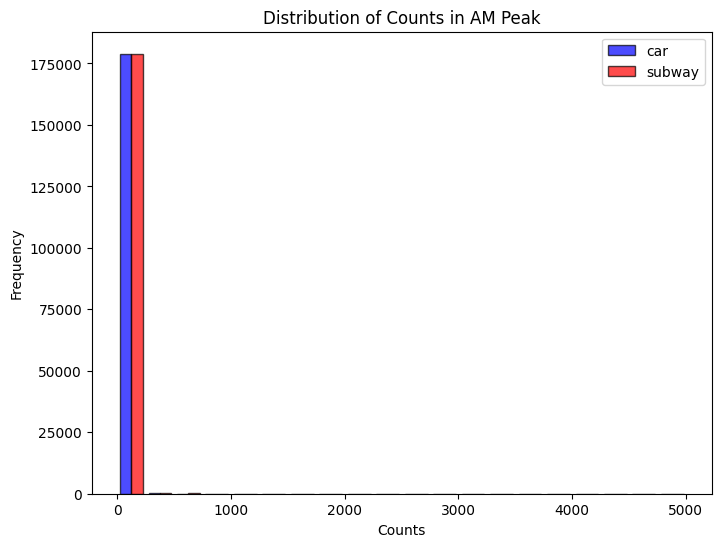

In [11]:
# Extract the data for the 'total' column
total_data = am_peak[['car', 'subway']]

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']  # Specify colors for 'car' and 'total'
plt.hist(total_data, bins=20, color=colors, edgecolor='black', alpha=0.7, label=['car', 'subway'])

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Counts in AM Peak')

# Add a legend to differentiate between 'car' and 'total'
plt.legend()

plt.show()

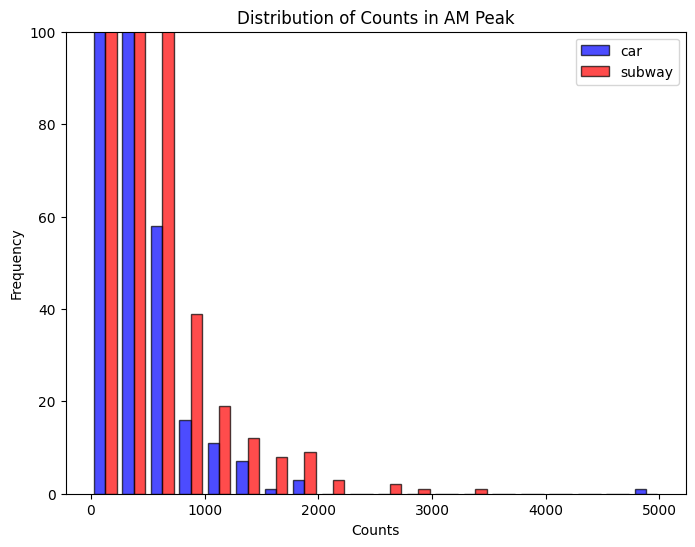

In [12]:
# Extract the data for the 'total' column
total_data = am_peak[['car', 'subway']]

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']  # Specify colors for 'car' and 'total'
plt.hist(total_data, bins=20, color=colors, edgecolor='black', alpha=0.7, label=['car', 'subway'])

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Counts in AM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

# Add a legend to differentiate between 'car' and 'total'
plt.legend()

plt.show()

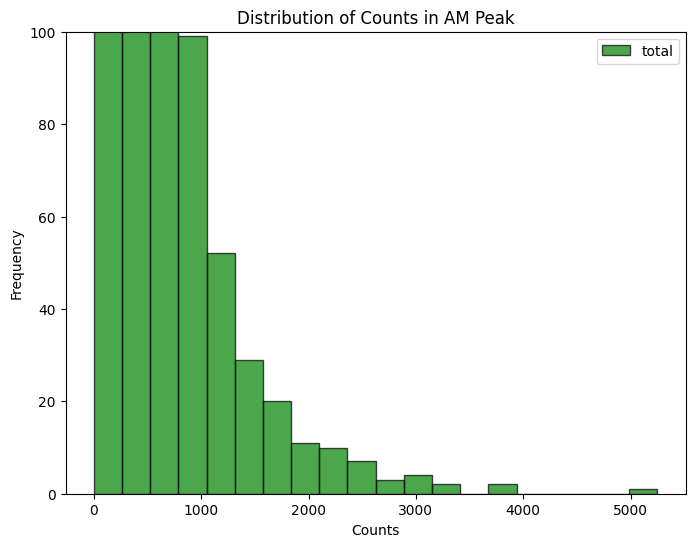

In [13]:
# Extract the data for the 'total' column
total_data = am_peak['total']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
colors = ['green']  # Specify colors for 'car' and 'total'
plt.hist(total_data, bins=20, color=colors, edgecolor='black', alpha=0.7, label=['total'])

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Counts in AM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

# Add a legend to differentiate between 'car' and 'total'
plt.legend()

plt.show()

In [14]:
pm_peak

,code_origin,code_dest,gu_origin,dong_origin,gu_dest,dong_dest,car,taxi,bus,subway,total
1,1.111054e+09,1.111060e+09,종로구,삼청동,종로구,가회동,0.091,1.094,1.416,0.044,2.645
2,1.111054e+09,1.111052e+09,종로구,삼청동,종로구,청운효자동,0.178,0.180,0.192,0.024,0.574
3,1.111054e+09,1.111055e+09,종로구,삼청동,종로구,부암동,1.936,0.092,0.486,0.040,2.554
4,1.111054e+09,1.111056e+09,종로구,삼청동,종로구,평창동,0.939,0.252,0.283,0.025,1.499
5,1.111054e+09,1.111053e+09,종로구,삼청동,종로구,사직동,1.002,13.287,0.238,0.045,14.572
...,...,...,...,...,...,...,...,...,...,...,...
179770,1.174068e+09,1.174064e+09,강동구,길동,강동구,성내1동,0.201,5.350,1.167,0.079,6.797
179771,1.174068e+09,1.174065e+09,강동구,길동,강동구,성내2동,20.381,11.711,256.265,105.240,393.597
179772,1.174068e+09,1.174066e+09,강동구,길동,강동구,성내3동,32.543,39.096,16.787,0.636,89.062
179773,1.174068e+09,1.174069e+09,강동구,길동,강동구,둔촌1동,0.637,1.933,0.447,2.244,5.261


In [15]:
pm_peak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179352 entries, 1 to 179774
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   code_origin  179352 non-null  float64
 1   code_dest    179352 non-null  float64
 2   gu_origin    179352 non-null  object 
 3   dong_origin  179352 non-null  object 
 4   gu_dest      179352 non-null  object 
 5   dong_dest    179352 non-null  object 
 6   car          179352 non-null  float64
 7   taxi         179352 non-null  float64
 8   bus          179352 non-null  float64
 9   subway       179352 non-null  float64
 10  total        179352 non-null  float64
dtypes: float64(7), object(4)
memory usage: 16.4+ MB


In [16]:
pm_peak[['car', 'taxi', 'bus', 'subway', 'total']].describe()

,car,taxi,bus,subway,total
count,179352.000000,179352.000000,179352.000000,179352.000000,179352.000000
mean,4.102677,1.002165,2.760725,4.112264,11.977832
std,32.831698,12.706302,23.902696,37.408524,67.486163
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.058000,0.001000,0.001000,0.076000,0.501000
75%,0.925000,0.066000,0.181000,0.923250,4.240000
max,6050.520000,1354.078000,2407.245000,2818.066000,6305.669000


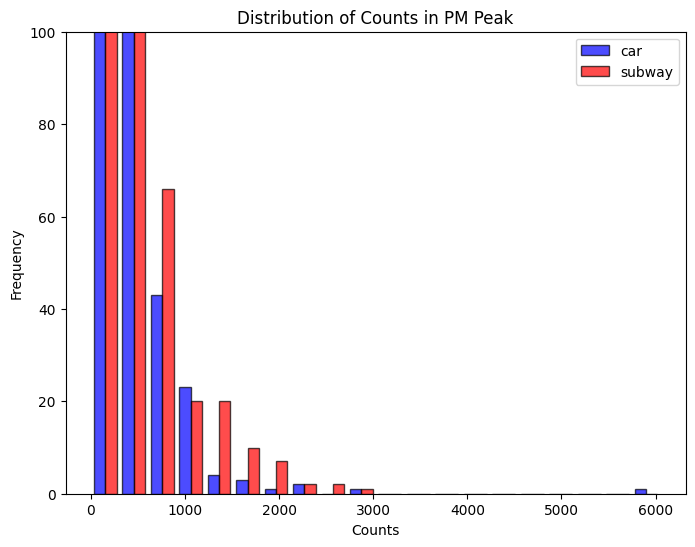

In [17]:
# Extract the data for the 'total' column
total_data = pm_peak[['car', 'subway']]

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']  # Specify colors for 'car' and 'total'
plt.hist(total_data, bins=20, color=colors, edgecolor='black', alpha=0.7, label=['car', 'subway'])

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Counts in PM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

# Add a legend to differentiate between 'car' and 'total'
plt.legend()

plt.show()

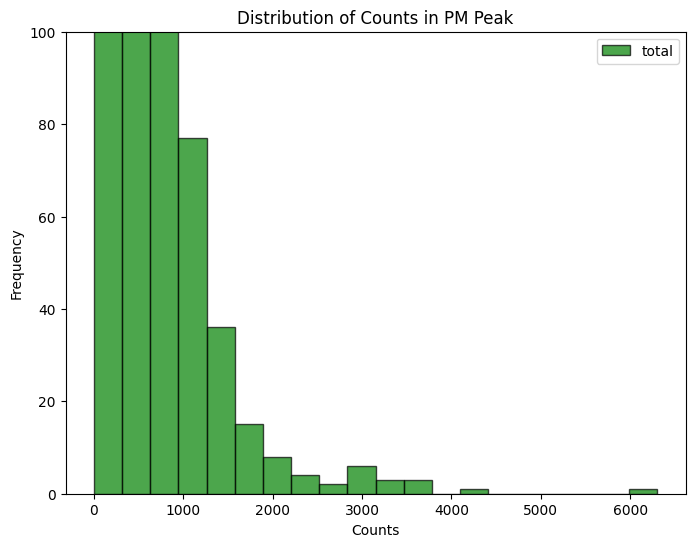

In [18]:
# Extract the data for the 'total' column
total_data = pm_peak['total']

# Create a histogram (distribution graph)
plt.figure(figsize=(8, 6))
colors = ['green']  # Specify colors for 'car' and 'total'
plt.hist(total_data, bins=20, color=colors, edgecolor='black', alpha=0.7, label=['total'])

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Counts in PM Peak')

# Set the y-axis range between 0 and 100
plt.ylim(0, 100)

# Add a legend to differentiate between 'car' and 'total'
plt.legend()

plt.show()

In [22]:
am_peak.nlargest(10, 'total')

,code_origin,code_dest,gu_origin,dong_origin,gu_dest,dong_dest,car,taxi,bus,subway,total
166613,1.171065e+09,1.171071e+09,송파구,잠실본동,송파구,잠실6동,5007.257,22.452,180.079,40.996,5250.784
139433,1.162064e+09,1.168064e+09,관악구,서원동,강남구,역삼1동,1791.188,23.242,11.174,1987.597,3813.201
165297,1.171058e+09,1.168064e+09,송파구,송파1동,강남구,역삼1동,137.521,15.021,539.419,2995.111,3687.072
28427,1.121582e+09,1.114055e+09,광진구,자양1동,중구,명동,3.569,0.474,16.027,3282.048,3302.118
118995,1.154567e+09,1.154551e+09,금천구,시흥1동,금천구,가산동,288.606,164.668,2143.681,632.458,3229.413
12739,1.114064e+09,1.114055e+09,중구,약수동,중구,명동,1443.264,4.456,33.799,1490.109,2971.628
144521,1.165052e+09,1.168064e+09,서초구,서초2동,강남구,역삼1동,1341.587,33.730,1361.505,229.429,2966.251
132649,1.159064e+09,1.168064e+09,동작구,사당3동,강남구,역삼1동,1175.871,4.313,60.633,1685.607,2926.424
136041,1.162060e+09,1.168064e+09,관악구,청룡동,강남구,역삼1동,80.746,139.052,10.184,2659.963,2889.945
120691,1.154571e+09,1.154551e+09,금천구,시흥5동,금천구,가산동,355.570,13.741,2453.026,7.172,2829.509


In [24]:
pm_peak.nlargest(10, 'total')

,code_origin,code_dest,gu_origin,dong_origin,gu_dest,dong_dest,car,taxi,bus,subway,total
172112,1.171071e+09,1.171065e+09,송파구,잠실6동,송파구,잠실본동,6050.520,33.867,174.692,46.590,6305.669
116880,1.154551e+09,1.154567e+09,금천구,가산동,금천구,시흥1동,405.682,119.938,2407.245,1323.882,4256.747
94386,1.147051e+09,1.150062e+09,양천구,목1동,강서구,우장산동,636.928,10.195,400.764,2675.003,3722.890
8086,1.114055e+09,1.114064e+09,중구,명동,중구,약수동,1424.241,29.941,42.047,1982.347,3478.576
7813,1.114054e+09,1.138055e+09,중구,회현동,은평구,갈현2동,6.242,0.564,2368.818,1094.609,3470.233
144097,1.165051e+09,1.168064e+09,서초구,서초1동,강남구,역삼1동,614.914,1317.894,205.551,1217.979,3356.338
153404,1.168064e+09,1.165052e+09,강남구,역삼1동,서초구,서초2동,1298.756,906.629,896.520,162.893,3264.798
177187,1.174061e+09,1.171051e+09,강동구,천호2동,송파구,풍납1동,152.730,293.704,16.386,2716.129,3178.949
8098,1.114055e+09,1.117063e+09,중구,명동,용산구,이촌1동,1042.665,15.031,708.483,1314.339,3080.518
110062,1.150060e+09,1.150059e+09,강서구,가양1동,강서구,화곡본동,2124.787,10.116,863.090,35.048,3033.041
